# Capstone Project IBM Data Science Specialization Report

This notebook is used to report the resume of the final project on the IBM Data Science Specialization. It's about Seattle car accident's database. The final goal is to predict the severity of an accident on the road. 

## Introduction

The world as a whole suffers due to car accidents, including the USA. In this report the selected data is from the city of Seattle. According to the National Highway Traffic Safety Administration of the USA and 2017 WSDOT data, a car accident occurs every 4 minutes and a person dies due to a car crash every 20 hours in the state of Washington while Fatal crashes went from 508 in 2016 to 525 in 2017, resulting in the death of 555 people. The project tried to predict severity of accidents in terms of human fatality, traffic delay, property damage, or any other type of accident bad impact.

### Stakeholders

The target audience of the project is local Seattle government, police, rescue groups, car drivers, and car insurance companies. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

### Data Source

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf Metadata Information of the database.

https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data Official Website of the used database. Thanks to City of Seattle for this good public databases.

## Data Understanding

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present.Our predictor or target variable will be 'SEVERITYCODE' because it measure the severity of an accident from 0 to 3 within the dataset.The variable can take the following values:

* 3—Fatality
* 2b—Serious Injury, 
* 2—Injury, 
* 1—Property Damage, 
* 0—unknown

The Dataset contains 221.266 records and 40 columns.

The distribution of the records is the following:

 1. Property Damage Only Collision 137485
 2. Injury Collision 58698, Unknown 21636, 
 3. Serious Injury Collision 3098, 
 4. Fatality Collision 349

Finally, because of the existence of null values in some records, the data needs to be preprocessed before any further processing.

Resume of the records in the Dataset for the Target Variable.

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

Taking a look to some columns' format

In [18]:
df_usedpre.dtypes

SEVERITYCODE       object
ADDRTYPE           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INJURIES            int64
SERIOUSINJURIES     int64
FATALITIES          int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
HITPARKEDCAR       object
dtype: object

Now I show some Examples of data exploration

<function matplotlib.pyplot.show(*args, **kw)>

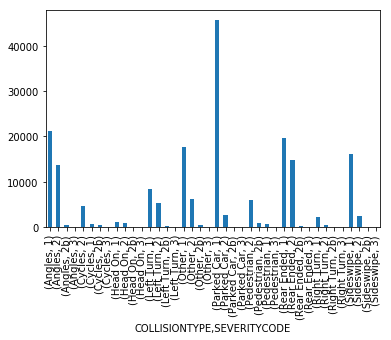

In [52]:
df_collision = df_usedpre.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()
df_collision.plot(kind = 'bar')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

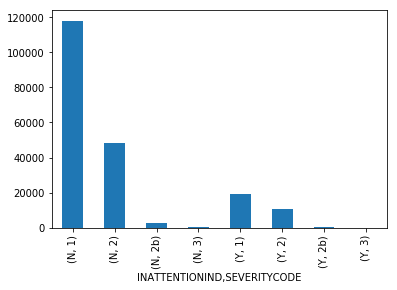

In [98]:
df_speed = df_usedpre.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts()
df_speed.plot(kind = 'bar')
plt.show

In [17]:
df_usedpre.shape

(221266, 19)

### Data Preprocessing

As said in the previous section, the dataset in the original form is not ready for data analysis. In order to prepare the data, first, we need to drop the non-relevant columns. In addition, most of the features are of object data types that need to be converted into numerical data types.

After analyzing the data set, I have decided to focus in only five features: PERSONCOUNT (Number of people involved in the accident, VEHCOUNT (number of vehicles in the accident , SPEEDING (Whether or not speeding was a factor in the
collision), INATTENTIONIND (Whether or not collision was due to inattention) and COLLISIONTYPE (Type of Collision).

To get a good understanding of the dataset, I have checked different values in the features. The results show, the target feature is imbalance, so I use a sklearn technique to balance it.

In [35]:
#Selection of several variables of the dataset, the idea was reduce computational resources and have a better data preprocessing

df_usedpre=df_data_1[['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
df_usedpre.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Injury Collision,Pedestrian,2,1,0,1,1,0,0,N,N,Clear,Dry,Daylight,Y,N,N
1,2,Intersection,Injury Collision,Angles,4,0,0,2,2,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
3,1,Intersection,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
4,0,Block,Unknown,N,0,0,0,0,0,0,0,N,NaN,NaN,NaN,NaN,N,N,N


In [5]:
#Droping rows with unknown values from the dataframe in order to eliminate a lot of null values
indexsever = df_usedpre[df_usedpre['SEVERITYDESC'] == 'Unknown'].index
df_usedpre.drop(indexsever, inplace=True)
df_usedpre.SEVERITYDESC.value_counts()


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Property Damage Only Collision    137485
Injury Collision                   58698
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [20]:
#Filling the missing values with a N in order to later create a dummy variable
df_usedpre['INATTENTIONIND'] = df_usedpre['INATTENTIONIND'].fillna('N')
df_usedpre['PEDROWNOTGRNT'] = df_usedpre['PEDROWNOTGRNT'].fillna('N')
df_usedpre['SPEEDING'] = df_usedpre['SPEEDING'].fillna('N')

In [113]:
#Checking numerical variables correlation
df_usedpre.corr()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES
PERSONCOUNT,1.000000,-0.019036,-0.038712,0.384149,0.279312,0.105406,0.046151
PEDCOUNT,-0.019036,1.000000,-0.019284,-0.270659,0.159474,0.130930,0.072196
PEDCYLCOUNT,-0.038712,-0.019284,1.000000,-0.258519,0.115113,0.060489,0.010353
VEHCOUNT,0.384149,-0.270659,-0.258519,1.000000,0.038395,-0.033886,-0.026232
INJURIES,0.279312,0.159474,0.115113,0.038395,1.000000,0.278154,0.066037
SERIOUSINJURIES,0.105406,0.130930,0.060489,-0.033886,0.278154,1.000000,0.172714
FATALITIES,0.046151,0.072196,0.010353,-0.026232,0.066037,0.172714,1.000000


In [18]:
#Finally let's try to balance the dataset, at least property damage with injury collision
from sklearn.utils import resample

predf_may=df_usedpre[df_usedpre.SEVERITYCODE=='1']
predf_min=df_usedpre[df_usedpre.SEVERITYCODE=='2']
predf_min2=df_usedpre[df_usedpre.SEVERITYCODE=='2b']
predf_min3=df_usedpre[df_usedpre.SEVERITYCODE=='3']

predf_may_down= resample(predf_may,replace=False,n_samples=58698,random_state=123)

df_used=pd.concat([predf_may_down,predf_min,predf_min2,predf_min3])

df_used.head()


,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
114648,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
26901,1,Block,Property Damage Only Collision,Rear Ended,5,0,0,4,0,0,0,N,N,Clear,Dry,Daylight,N,N,N
201061,1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,N,Y,Clear,Dry,Daylight,N,N,Y
46978,1,Intersection,Property Damage Only Collision,Other,1,0,0,1,0,0,0,N,N,Raining,Wet,Dark - Street Lights On,N,N,N
148467,1,Block,Property Damage Only Collision,Parked Car,4,0,0,2,0,0,0,N,N,Clear,Dry,Daylight,N,N,N


In [19]:
df_used.SEVERITYDESC.value_counts()

Property Damage Only Collision    58698
Injury Collision                  58698
Serious Injury Collision           3098
Fatality Collision                  349
Name: SEVERITYDESC, dtype: int64

## Methodology 

With this in mind, the candidates variables are used to create the machine learning models: Decision Tree, K-Neighbors, SVM and Logistic Regression
K-Nearest Neighbor (KNN)

KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

Decision Tree
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

Also I will implement SVM (Support Vector Machine) and Logistic Regression.

#### Selection of the X and Y

In [52]:
#Now is time to create the feature to use in the prediction models.
X = df_used[['PERSONCOUNT', 'VEHCOUNT','SPEEDING', 'INATTENTIONIND']]  #.astype(float)
#Using hot encoding with Collisiontype column
X = pd.concat([X,pd.get_dummies(df_used['COLLISIONTYPE'])], axis=1)
X[0:5]

,PERSONCOUNT,VEHCOUNT,SPEEDING,INATTENTIONIND,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
114648,2,2,0,0,0,0,0,0,0,1,0,0,0,0
26901,5,4,0,0,0,0,0,0,0,0,0,1,0,0
201061,2,2,0,0,0,0,0,0,0,1,0,0,0,0
46978,1,1,0,0,0,0,0,0,1,0,0,0,0,0
148467,4,2,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
#Prediction variable 
y = df_used['SEVERITYCODE'].values
y[0:5]

array(['1', '1', '1', '1', '1'], dtype=object)

In [20]:
#Now I change categorical variables to numerical variables in order to use the models

df_used['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_used['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)


### Data Standarization

In [54]:
#Standarizing the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.36106335,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [ 1.71043543,  3.10289094, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458, -0.47594242,
        -0.25324592,  2.03913186, -0.11660396, -0.29097979],
       [-0.36106335,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [-1.05156295, -1.32149932, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253,  2.7232034 , -0.47594242,
        -0.25324592, -0.49040478, -0.11660396, -0.29097979],
       [ 1.01993583,  0.15329744, -0.24006817, -0.43281766, -0.48897614,
        -0.21876123, -0.11169375, -0.28962253, -0.36721458,  2.1010945 ,
        -0.25324592, -0.49

### Separation of the data in Train (70%) and Test (30%)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (84590, 14) (84590,)
Test set: (36253, 14) (36253,)


Here we will begin our modeling and predictions

### K-Neigbors

The best accuracy was 0.6491600695114887 with k= 9


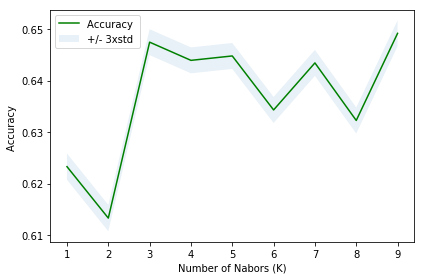

In [66]:
#loop to find the best K for the model
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [67]:
#Creating the KNN Model
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
descTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
descTree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Support Vector Machine

In [75]:
from sklearn import svm
three_svm = svm.SVC(kernel='rbf')
three_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
four_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Results and Evaluation

The final results of the model evaluations are summarized in the following table:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.649   | 0.638    | NA      |
| Decision Tree      | 0.663   | 0,73     | NA      |
| SVM                | 0.687   | 0.675    | NA      |
| LogisticRegression | 0.682   | 0.670    | 0.657   |

## Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so Transforming some of them with dummies (1 and 0) was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with the same total of class 2.

Once we analyzed and cleaned the data, it was then fed through four Machine Learning models; K-Nearest Neighbors, Decision Tree Support Vector Machine (SVM) and Logistic Regression. Although the first two are ideal for this project, logistic regression and SVM helps because it was a clasification model.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression.

## Conclusion and Next Steeps

Based on the dataset provided for this capstone from type of Collition, number of people and cars involved into the accident, and some crucial factors like over speed and innatention of drivers we can conclude that particular conditions have a somewhat impact on whether or not travel could result in property damage (class 1), injury (class 2), or Class 2b and 3.

It's an important thing check the accuracy of the models, the numbers are near of 70%, this means that the movel can be improved, analyzing new variables, changing train and test dataset, etc. 


Thank you for reading!